In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1.Data Exploration and Preprocessing


In [ ]:
df=pd.read_csv('blogs.csv')

In [ ]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [ ]:
df.shape

(2000, 2)

In [ ]:
df.size

4000

In [ ]:
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Data cleaning function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.strip()  # Remove leading/trailing whitespace
    return text


In [ ]:
df['Data'] = df['Data'].apply(clean_text)

In [ ]:
# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
df['Data'] = df['Data'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Data']).toarray()
y = df['Labels']

In [ ]:
print(X.shape, y.shape)

(2000, 5000) (2000,)


### 2. Naive Bayes Model for Text Classification

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred = nb_classifier.predict(x_test)

In [ ]:
y_pred

array(['talk.politics.misc', 'comp.sys.ibm.pc.hardware', 'sci.med',
       'rec.sport.baseball', 'sci.electronics', 'sci.electronics',
       'rec.sport.baseball', 'talk.politics.mideast', 'alt.atheism',
       'sci.med', 'alt.atheism', 'sci.electronics', 'sci.crypt',
       'comp.windows.x', 'comp.sys.ibm.pc.hardware',
       'comp.os.ms-windows.misc', 'rec.autos', 'comp.graphics',
       'talk.politics.guns', 'talk.politics.misc',
       'comp.sys.mac.hardware', 'talk.politics.misc', 'alt.atheism',
       'rec.sport.hockey', 'alt.atheism', 'sci.crypt', 'sci.crypt',
       'rec.sport.baseball', 'rec.autos', 'alt.atheism',
       'rec.sport.baseball', 'rec.sport.hockey', 'comp.windows.x',
       'rec.sport.baseball', 'rec.sport.hockey', 'comp.sys.mac.hardware',
       'sci.med', 'sci.electronics', 'rec.sport.hockey',
       'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
       'soc.religion.christian', 'comp.os.ms-windows.misc',
       'comp.graphics', 'soc.religion.christian',

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.84
Precision: 0.8466866785175607
Recall: 0.84
F1 Score: 0.8330936672448417

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.75      0.83      0.79        18
 comp.os.ms-windows.misc       0.91      0.91      0.91        22
comp.sys.ibm.pc.hardware       0.81      0.84      0.82        25
   comp.sys.mac.hardware       0.86      0.90      0.88        21
          comp.windows.x       0.95      0.84      0.89        25
            misc.forsale       1.00      0.78      0.88        18
               rec.autos       0.95      1.00      0.97        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.90      1.00      0.95        19
         sci.electronics     

## 3. Sentiment Analysis

In [ ]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   -- ------------------------------------- 41.0/626.3 kB 1.9 MB/s eta 0:00:01
   ----- ---------------------------------- 92.2/626.3 kB 1.1 MB/s eta 0:00:01
   --------- ------------------------------ 153.6/626.3 kB 1.3 MB/s eta 0:00:01
   -------------- ------------------------- 225.3/626.3 kB 1.3 MB/s eta 0:00:01
   ---------------- ----------------------- 256.0/626.3 kB 1.1 MB/s eta 0:00:01
   ------------------ --------------------- 286.7/626.3 kB 1.1 MB/s eta 0:00:01
   --------------------- ------------------ 337.9/626.3 kB 1.1 MB/s eta 0:00:01
   ------------------------ --------------- 389.1/626.3 kB 1.1 MB/s eta 0:00:01
   ---------------------------- ----------- 440.3/626.3 kB 1.1 MB/s eta 0:00:01
   -------------------------------- ------- 501.8/626.3 kB 1.1 MB/s e

In [ ]:
from textblob import TextBlob

In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'


In [ ]:
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [ ]:
print(df['Sentiment'].value_counts())

Sentiment
Positive    1452
Negative     545
Neutral        3
Name: count, dtype: int64


In [ ]:
sentiment_distribution = df.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack()
print(sentiment_distribution)

Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                   0.35      NaN      0.65
comp.graphics                 0.28      NaN      0.72
comp.os.ms-windows.misc       0.23      NaN      0.77
comp.sys.ibm.pc.hardware      0.19      NaN      0.81
comp.sys.mac.hardware         0.26      NaN      0.74
comp.windows.x                0.20     0.02      0.78
misc.forsale                  0.21      NaN      0.79
rec.autos                     0.24      NaN      0.76
rec.motorcycles               0.28      NaN      0.72
rec.sport.baseball            0.35      NaN      0.65
rec.sport.hockey              0.40      NaN      0.60
sci.crypt                     0.19      NaN      0.81
sci.electronics               0.25      NaN      0.75
sci.med                       0.34      NaN      0.66
sci.space                     0.28      NaN      0.72
soc.religion.christian        0.25      NaN      0.75
talk.politics.guns          

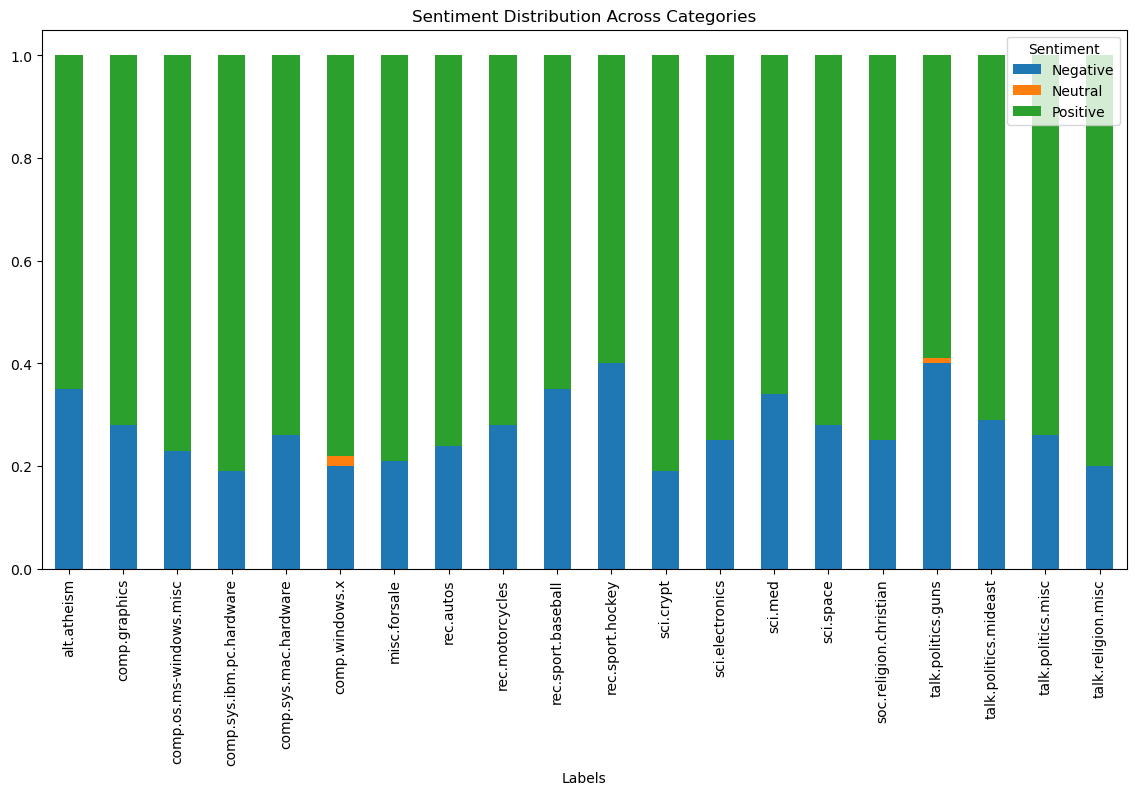

In [ ]:
# Plotting of distribution of sentiments
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Sentiment Distribution Across Categories')
plt.show()

### 4. Evaluation`

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.84
Precision: 0.8466866785175607
Recall: 0.84
F1 Score: 0.8330936672448417

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.75      0.83      0.79        18
 comp.os.ms-windows.misc       0.91      0.91      0.91        22
comp.sys.ibm.pc.hardware       0.81      0.84      0.82        25
   comp.sys.mac.hardware       0.86      0.90      0.88        21
          comp.windows.x       0.95      0.84      0.89        25
            misc.forsale       1.00      0.78      0.88        18
               rec.autos       0.95      1.00      0.97        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.90      1.00      0.95        19
         sci.electronics     

In [ ]:
# Summarize the findings and discuss any challenges.

print("Model Evaluation Summary:")
print("The Naive Bayes classifier achieved an accuracy of {:.2f}%, a precision of {:.2f}%, a recall of {:.2f}%, and an F1 score of {:.2f}% on the test set.".format(
    accuracy_score(y_test, y_pred) * 100,
    precision_score(y_test, y_pred, average='weighted') * 100,
    recall_score(y_test, y_pred, average='weighted') * 100,
    f1_score(y_test, y_pred, average='weighted') * 100
))

print("\nSentiment Analysis Summary:")
print("The sentiment analysis revealed the following distribution of sentiments across different categories:")
print(sentiment_distribution)

print("\nChallenges and Observations:")
print("1. Text preprocessing is crucial for achieving good performance with text classification models.")
print("2. Balancing the dataset and handling class imbalance can be challenging.")
print("3. Sentiment analysis provides insights into the emotional tone of the blog posts, which can be useful for understanding the content better.")

Model Evaluation Summary:
The Naive Bayes classifier achieved an accuracy of 84.00%, a precision of 84.67%, a recall of 84.00%, and an F1 score of 83.31% on the test set.

Sentiment Analysis Summary:
The sentiment analysis revealed the following distribution of sentiments across different categories:
Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                   0.35      NaN      0.65
comp.graphics                 0.28      NaN      0.72
comp.os.ms-windows.misc       0.23      NaN      0.77
comp.sys.ibm.pc.hardware      0.19      NaN      0.81
comp.sys.mac.hardware         0.26      NaN      0.74
comp.windows.x                0.20     0.02      0.78
misc.forsale                  0.21      NaN      0.79
rec.autos                     0.24      NaN      0.76
rec.motorcycles               0.28      NaN      0.72
rec.sport.baseball            0.35      NaN      0.65
rec.sport.hockey              0.40      NaN      0